In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# Import data from the CSV file to a pandas DataFrame.
player_df = pd.read_csv('player_data.csv')

In [4]:
# Print out the first five rows of the player_df DataFrame.
player_df.head()
# Total up the number of NaN values in each row of the DataFrame.
player_df.isna().sum()
# Print out the information about the DataFrame.
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           46 non-null     int64  
 1   points       43 non-null     float64
 2   possessions  43 non-null     float64
 3   team_pace    43 non-null     float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   GP           39 non-null     float64
 7   MPG          40 non-null     float64
 8   TS%          45 non-null     float64
 9   AST          45 non-null     float64
 10  TO           45 non-null     float64
 11  USG          45 non-null     float64
 12  ORR          45 non-null     float64
 13  DRR          45 non-null     float64
 14  REBR         45 non-null     float64
 15  PER          36 non-null     float64
dtypes: float64(15), int64(1)
memory usage: 5.9 KB


In [5]:
# Drop columns that have no values.
player_df.dropna(axis='columns', inplace=True, how='all')
player_df.isna().sum()
player_df.info()
# Drop rows that have no values.
player_df.dropna(inplace=True, how='all')
player_df.isna().sum()

# Drop all rows that don't have at least 12 non-NaN values.
player_df.dropna(inplace=True, thresh=12)
player_df.isna().sum()

# Renumber the DataFrame index to account for the dropped rows.
player_df.reset_index(drop=True, inplace=True)
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           46 non-null     int64  
 1   points       43 non-null     float64
 2   possessions  43 non-null     float64
 3   team_pace    43 non-null     float64
 4   GP           39 non-null     float64
 5   MPG          40 non-null     float64
 6   TS%          45 non-null     float64
 7   AST          45 non-null     float64
 8   TO           45 non-null     float64
 9   USG          45 non-null     float64
 10  ORR          45 non-null     float64
 11  DRR          45 non-null     float64
 12  REBR         45 non-null     float64
 13  PER          36 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 5.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -----------

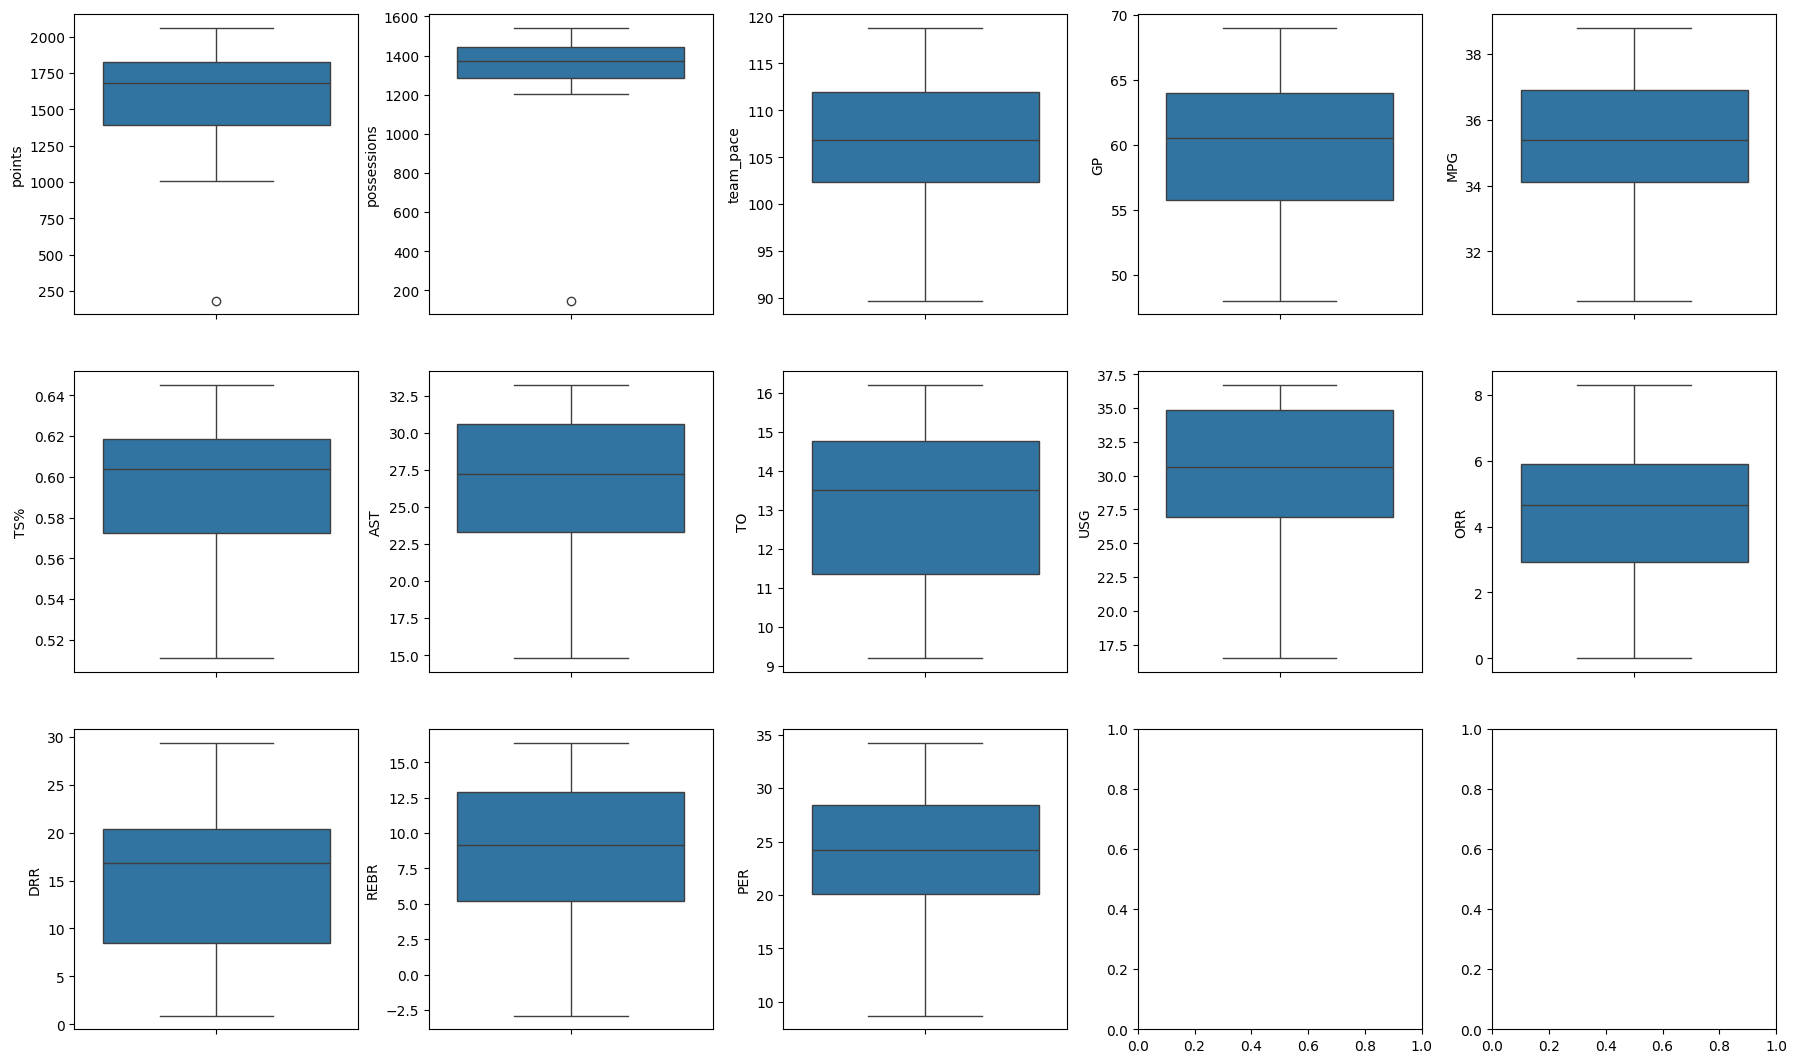

In [6]:
# A quick way to identify outliers is to use the pandas describe() function
player_df.describe()
# Create a list of all column names, except for ID.
cols = list(player_df.iloc[:, 1:])

# Create a 3x5 matrix of subplots.
fig, axes = plt.subplots(3, 5, figsize=(18, 11))

# Create padding around subplots to make the axis labels readable.
fig.tight_layout(pad=2.0)

# Loop over the columns of the DataFrame and create a box plot for each one.
for i in range(len(cols)):
    sns.boxplot(ax=axes[i//5, i%5], y=player_df[cols[i]])

In [7]:
# Identify the index number of the row that has the lowest value in 'points'.
points_outlier = player_df['points'].idxmin()
points_outlier

# Identify the index number of the row that has the lowest value in 'possession'.
possession_outlier = player_df['possessions'].idxmin()
possession_outlier

# Drop the row that has the outlying values for 'points' and 'possessions'.
player_df.drop(player_df.index[points_outlier], inplace=True)

# Check the end of the DataFrame to ensure that the correct row was dropped.
player_df.tail(10)

# Renumber the DataFrame index to reflect the dropped rows.
player_df.reset_index(drop=True, inplace=True)

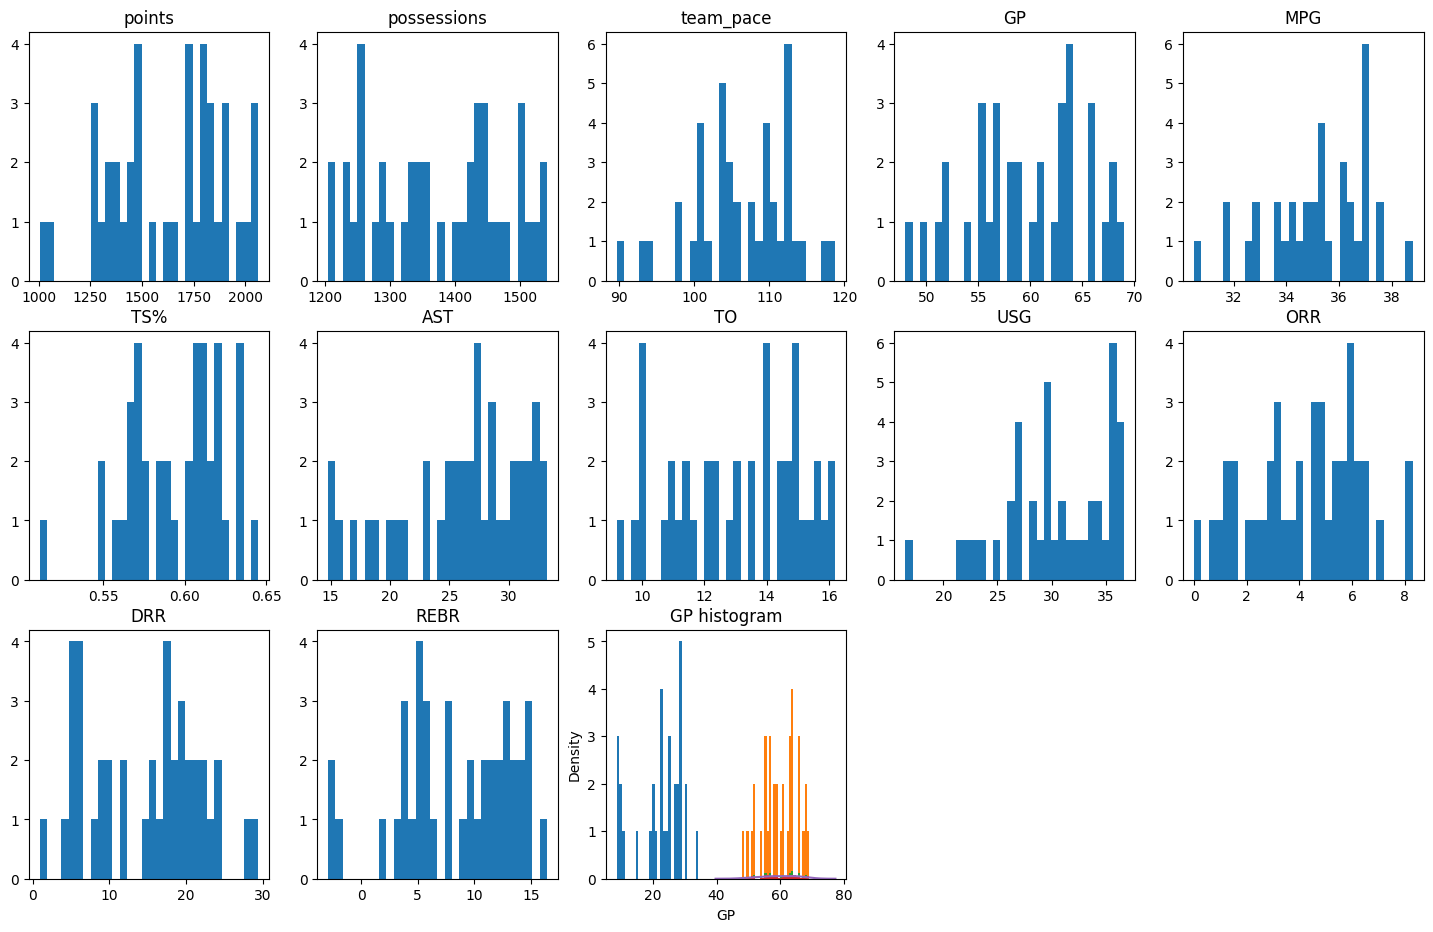

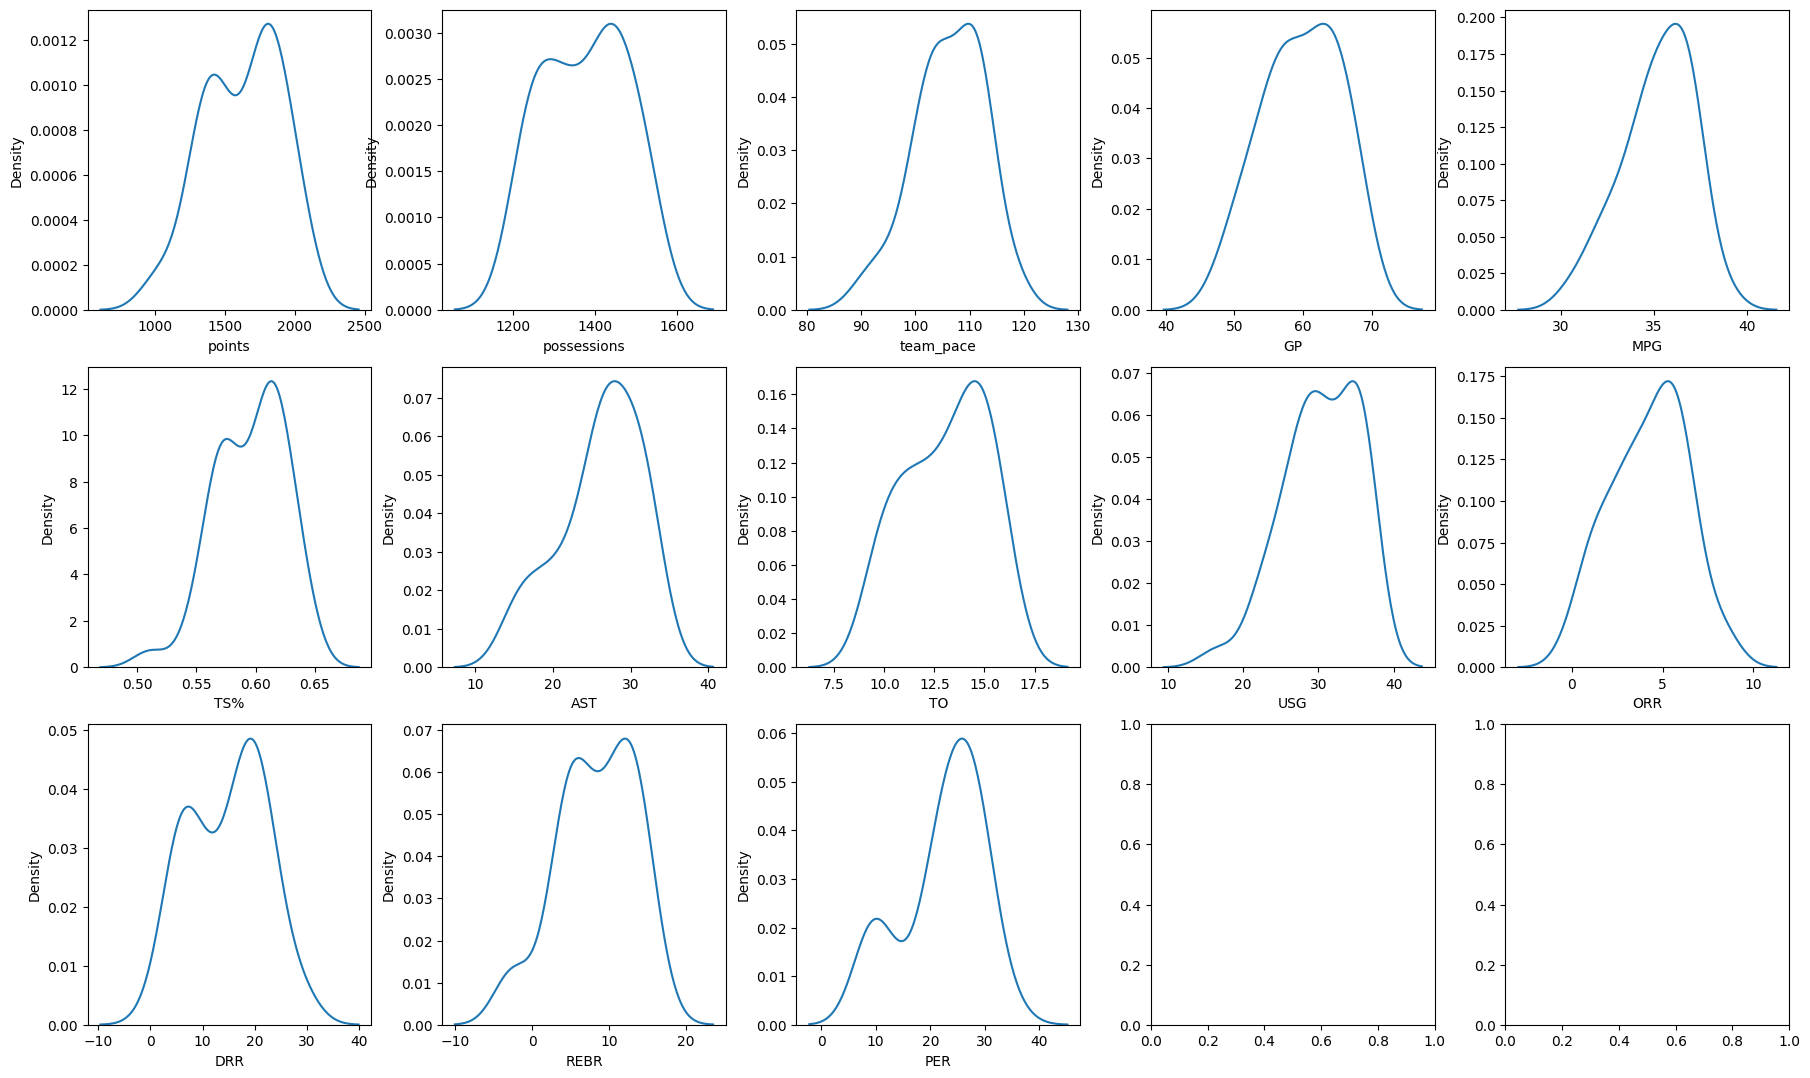

In [8]:
# Recheck the totals for NaN values by row.
player_df.isna().sum()

# Create a list of all column names, except for 'ID'.
cols = list(player_df.iloc[:, 1:])

# Define the size for the plots and add padding around them.
fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)

# Loop over the columns in the DataFrame and create a histogram for each one.
for i in range(len(cols)):
    plt.subplot(3, 5, i+1)
    plt.hist(player_df[cols[i]], bins=30)
    plt.title(cols[i])

# Create a histogram for the 'GP' column.
plt.hist(player_df['GP'], bins=30);

# Create a histogram for the 'GP' column, this time as a probability density.
plt.hist(player_df['GP'], density=True, bins=30);

# Plot the KDE for 'GP' over the probability-density histogram.
plt.hist(player_df['GP'], density=True, bins=15)
plt.title('GP histogram')
sns.kdeplot(player_df['GP']);

# Create a list of all column names, except for 'ID'.
cols = list(player_df.iloc[:, 1:])

# Create a 3x5 matrix of subplots and add padding around them for readability.
fig, axes = plt.subplots(3, 5, figsize=(18, 11))
fig.tight_layout(pad=2.0)

# Loop over the columns of the DataFrame and create a KDE for each one.
for i in range(len(cols)):
    sns.kdeplot(ax=axes[i//5, i%5], data=player_df[cols[i]])

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           23 non-null     int64  
 1   points       23 non-null     float64
 2   possessions  23 non-null     float64
 3   team_pace    23 non-null     float64
 4   GP           20 non-null     float64
 5   MPG          20 non-null     float64
 6   TS%          23 non-null     float64
 7   AST          23 non-null     float64
 8   TO           23 non-null     float64
 9   USG          23 non-null     float64
 10  ORR          23 non-null     float64
 11  DRR          23 non-null     float64
 12  REBR         23 non-null     float64
 13  PER          20 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 2.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
29,34,1743.0,1422.4,112.9,64.0,36.3,0.619,30.9,15.6,34.5,5.9,18.9,14.8,NaN


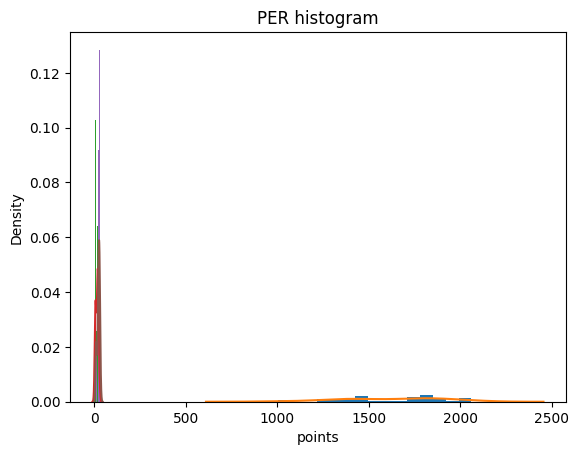

In [9]:
# Plot the KDE for 'points' over the probability-density histogram.
plt.hist(player_df['points'], density=True, bins=15)
plt.title('Points histogram')
sns.kdeplot(player_df['points']);

player_df.loc[player_df['points'] >= 1600].info()

# Plot the KDE for 'DRR' over the probability-density histogram.
plt.hist(player_df['DRR'], density=True, bins=15)
plt.title('DRR histogram')
sns.kdeplot(player_df['DRR']);

player_df.loc[(player_df['points'] >= 1600) & (player_df['DRR'] >= 15)].info()

# Plot the KDE for 'PER' over the probability-density histogram.
plt.hist(player_df['PER'], density=True, bins=15)
plt.title('PER histogram')
sns.kdeplot(player_df['PER']);
player_df.loc[(player_df['points'] >= 1600) & (player_df['DRR'] >= 15) & (player_df['PER'] >= 17)]

player_df.loc[player_df['ID'] == 34]

In [10]:
# Initialize the list to house the player data.
pop_list = []

# If the ID number is 30 or less, it's a human player; otherwise, it's a Tune Squad player.
for id in player_df['ID']:
    if id <= 30:
        pop_list.append('player'+str(id))
    else:
        pop_list.append('tune_squad'+str(id%30))

pop_list

# Assign this list as the values for the new player column in the DataFrame.
player_df['player'] = pop_list
player_df.head()

# Create list of all DataFrame column names but the last one.
column_list = list(player_df.iloc[:, :-1])

# Make player the second item in the list.
column_list.insert(1, 'player')

# Reassign the columns in the player_df DataFrame in this new order.
player_df = player_df[column_list]

# Verify that the columns are ordered the way you expect.
player_df.head()

,ID,player,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,player1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,player2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,player3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,player4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,player5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38


ID             0
player         0
points         0
possessions    0
team_pace      0
GP             0
MPG            0
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

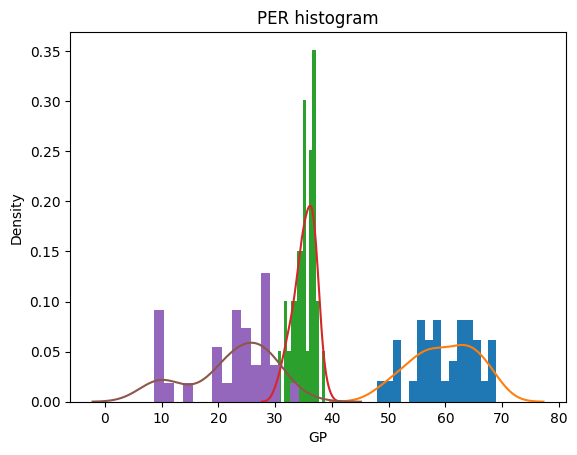

In [12]:
# Recheck the totals for NaN values by row.
player_df.isna().sum()

# Plot the KDE for 'GP' over the probability-density histogram.
plt.hist(player_df['GP'], density=True, bins=15)
plt.title('GP histogram')
sns.kdeplot(player_df['GP']);

# Plot the KDE for 'MPG' over the probability-density histogram.
plt.hist(player_df['MPG'], density=True, bins=15)
plt.title('MPG histogram')
sns.kdeplot(player_df['MPG']);

# Plot the KDE for 'PER' over the probability-density histogram.
plt.hist(player_df['PER'], density=True, bins=15)
plt.title('PER histogram')
sns.kdeplot(player_df['PER']);

# Replace the missing values in 'GP' and 'MPG' with the mean values of the respective columns.
player_df[['GP','MPG']] = player_df[['GP','MPG']].fillna(value=player_df[['GP','MPG']].mean())

# Recheck the totals for NaN values by row to ensure that the expected missing values are filled in.
player_df.isna().sum()

Mean r2 score: 0.9995
10% of r2 scores are between 0.9985 and 0.9987
10% of r2 scores are between 0.9987 and 0.9988
10% of r2 scores are between 0.9995 and 0.9996
10% of r2 scores are between 0.9996 and 0.9997
60% of r2 scores are between 0.9997 and 0.9998


c:\Users\julat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ID             0
player         0
points         0
possessions    0
team_pace      0
GP             0
MPG            0
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            0
dtype: int64

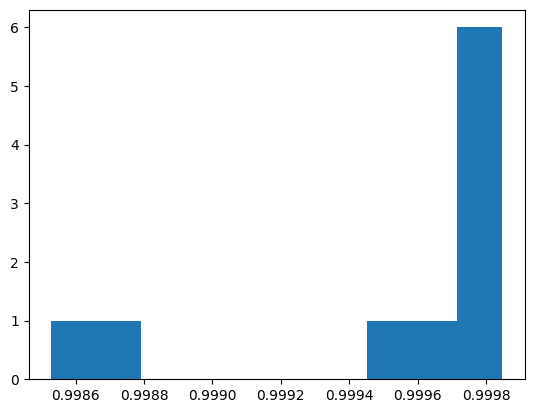

In [15]:
# Define the variables for the regression model as those rows that have no missing values.
X = player_df.dropna(how='any').iloc[:, 5:-1].to_numpy()
y = player_df.dropna(how='any').iloc[:, -1]

# Define the regression model.
lin_reg = LinearRegression()

# Use the scikit-learn cross-validation function to fit this model 10 times and return the R2 scores.
scores = cross_val_score(lin_reg, X, y, cv=10, scoring='r2')

# Define the histogram of the scores and copy out information from the histogram.
entries, bin_edges, patches = plt.hist(scores, bins=10);

# Print out the mean and the results from the histogram.
print('Mean r2 score: {:.4f}'.format(scores.mean()))
for i in range(len(entries)):
    if entries[i] > 0:
        print('{:.0f}% of r2 scores are between {:.4f} and {:.4f}'.format(entries[i]*100/len(entries), 
        bin_edges[i], 
        bin_edges[i+1]))

# Fit the same regression model, this time using all of the available data.
lin_reg.fit(X, y)

# Create and display a mask of rows in the DataFrame. Rows should contain at least one NaN value.
mask = player_df.isnull().any(axis=1)
mask

# Apply the mask defined earlier to show the contents of specific columns of rows that contain NaN values.
player_df.loc[mask].iloc[:, 5:-1]

# Impute the missing values in 'PER' by using the regression model and mask.
player_df.loc[mask, 'PER'] = lin_reg.predict(player_df.loc[mask].iloc[:, 5:-1])

# Recheck the DataFrame for rows that have missing values.
player_df.isna().sum()

In [16]:
#save this DataFrame to a CSV file.
player_df.to_csv('player_data_final.csv', index=False)